**Q-3.** 

**Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following**

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

**a. Measure the dispersion in both and interpret the results.**

**b. Calculate mean and 5% confidence interval and plot it in a graph**

**c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.**

**d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.**

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')
Dispersion measures for  Blood Pressure Before (mmHg) :
{'Range': 28, 'Variance': 43.10189999999998, 'Standard Deviation': 6.5652037287505385}
Dispersion measures for  Blood Pressure After (mmHg) :
{'Range': 23, 'Variance': 46.97040000000002, 'Standard Deviation': 6.853495458523338}
Mean and 5% confidence interval for  Blood Pressure Before (mmHg) :
Mean: 133.91
Confidence Interval: (132.61676127359584, 135.20323872640415)
Mean and 5% confidence interval for  Blood Pressure After (mmHg) :
Mean: 128.36
Confidence Interval: (127.00997247543387, 129.71002752456616)


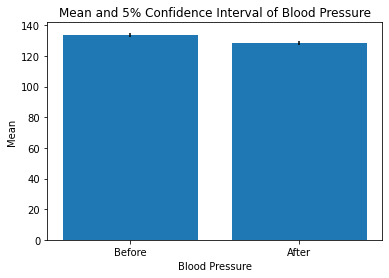

Mean Absolute Deviation (MAD) for  Blood Pressure Before (mmHg) : 5.7118
Mean Absolute Deviation (MAD) for  Blood Pressure After (mmHg) : 5.9
Standard Deviation (SD) for  Blood Pressure Before (mmHg) : 6.5652037287505385
Standard Deviation (SD) for  Blood Pressure After (mmHg) : 6.853495458523338
Correlation Coefficient: 0.9779485966556027
p-value: 1.8097381433033208e-68
The correlation is significant at the 1% level of significance.


In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Check the column names in the dataset
print(data.columns)

# Update the column names with leading spaces
before_column = ' Blood Pressure Before (mmHg)'
after_column = ' Blood Pressure After (mmHg)'

# Measure dispersion
before_dispersion = {
    'Range': np.ptp(data[before_column]),
    'Variance': np.var(data[before_column]),
    'Standard Deviation': np.std(data[before_column])
}

after_dispersion = {
    'Range': np.ptp(data[after_column]),
    'Variance': np.var(data[after_column]),
    'Standard Deviation': np.std(data[after_column])
}

print('Dispersion measures for', before_column, ':')
print(before_dispersion)
print('Dispersion measures for', after_column, ':')
print(after_dispersion)

# Calculate mean and confidence interval
before_mean = np.mean(data[before_column])
before_ci = stats.norm.interval(0.95, loc=before_mean, scale=stats.sem(data[before_column]))

after_mean = np.mean(data[after_column])
after_ci = stats.norm.interval(0.95, loc=after_mean, scale=stats.sem(data[after_column]))

print('Mean and 5% confidence interval for', before_column, ':')
print('Mean:', before_mean)
print('Confidence Interval:', before_ci)
print('Mean and 5% confidence interval for', after_column, ':')
print('Mean:', after_mean)
print('Confidence Interval:', after_ci)

# Plot the means and confidence intervals
plt.bar(['Before', 'After'], [before_mean, after_mean], yerr=[before_ci[1] - before_mean, after_ci[1] - after_mean])
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Mean and 5% Confidence Interval of Blood Pressure')
plt.show()

# Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)
before_mad = np.mean(np.abs(data[before_column] - before_mean))
after_mad = np.mean(np.abs(data[after_column] - after_mean))

before_sd = np.std(data[before_column])
after_sd = np.std(data[after_column])

print('Mean Absolute Deviation (MAD) for', before_column, ':', before_mad)
print('Mean Absolute Deviation (MAD) for', after_column, ':', after_mad)
print('Standard Deviation (SD) for', before_column, ':', before_sd)
print('Standard Deviation (SD) for', after_column, ':', after_sd)

# Calculate correlation coefficient and significance
correlation_coefficient, p_value = stats.pearsonr(data[before_column], data[after_column])

print('Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

if p_value < 0.01:
    print('The correlation is significant at the 1% level of significance.')
else:
    print('The correlation is not significant at the 1% level of significance.')